# Importing the Data

In [50]:
#Dependencies
import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
#Import Death Mechanism CSV File
file = "NCHS_-_Injury_Mortality__United_States.csv"

# Read Death Mechanism File 
raw_df = pd.read_csv(file)
raw_df.head()

,Year,Sex,Age group (years),Race,Injury mechanism,Injury intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit,Unit
0,2016,Both sexes,All Ages,All races,All Mechanisms,All Intentions,231991,323127513,71.80,0.15,71.50,72.09,68.98,0.15,68.70,69.27,"per 100,000 population"
1,2015,Both sexes,All Ages,All races,All Mechanisms,All Intentions,214008,321418820,66.58,0.14,66.30,66.86,63.87,0.14,63.59,64.14,"per 100,000 population"
2,2014,Both sexes,All Ages,All races,All Mechanisms,All Intentions,199752,318857056,62.65,0.14,62.37,62.92,60.13,0.14,59.86,60.40,"per 100,000 population"
3,2013,Both sexes,All Ages,All races,All Mechanisms,All Intentions,192945,316128839,61.03,0.14,60.76,61.31,58.77,0.14,58.51,59.04,"per 100,000 population"
4,2012,Both sexes,All Ages,All races,All Mechanisms,All Intentions,190385,313914040,60.65,0.14,60.38,60.92,58.70,0.14,58.43,58.96,"per 100,000 population"


In [3]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
clean_df = raw_df[["Year", "Sex", "Age group (years)", "Injury mechanism", "Injury intent", "Deaths"]]
clean_df.head()

,Year,Sex,Age group (years),Injury mechanism,Injury intent,Deaths
0,2016,Both sexes,All Ages,All Mechanisms,All Intentions,231991
1,2015,Both sexes,All Ages,All Mechanisms,All Intentions,214008
2,2014,Both sexes,All Ages,All Mechanisms,All Intentions,199752
3,2013,Both sexes,All Ages,All Mechanisms,All Intentions,192945
4,2012,Both sexes,All Ages,All Mechanisms,All Intentions,190385


In [4]:
# Rename the headers to be more explanatory
clean_df = clean_df.rename(columns={"Age group (years)": "Age_Group", "Injury mechanism": "Injury_Mechanism", "Injury intent": "Injury_Intent", "Age Specific Rate": "Age_Specific_Rate"
                                        })
#Drop NA fields and duplicates
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()

# Print dataframe
clean_df.head()

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
0,2016,Both sexes,All Ages,All Mechanisms,All Intentions,231991
1,2015,Both sexes,All Ages,All Mechanisms,All Intentions,214008
2,2014,Both sexes,All Ages,All Mechanisms,All Intentions,199752
3,2013,Both sexes,All Ages,All Mechanisms,All Intentions,192945
4,2012,Both sexes,All Ages,All Mechanisms,All Intentions,190385


In [5]:
# Clean data
clean_df = clean_df.loc[clean_df["Injury_Intent"] == "Suicide"]
clean_df = clean_df.loc[clean_df["Age_Group"] == "All Ages"]
clean1_df = clean_df[clean_df["Sex"] !='Both sexes']
clean2_df = clean1_df[clean_df["Injury_Mechanism"] !='All Mechanisms']
clean3_df = clean2_df[clean2_df["Injury_Mechanism"] !='Unspecified']
clean4_df = clean3_df[clean2_df["Injury_Mechanism"] !='All Other Specified']
suicide_method_df = clean4_df

#Print new dataframe
suicide_method_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
12600,2016,Male,All Ages,Cut/pierce,Suicide,713
12601,2015,Male,All Ages,Cut/pierce,Suicide,606
12602,2014,Male,All Ages,Cut/pierce,Suicide,616
12603,2013,Male,All Ages,Cut/pierce,Suicide,617
12604,2012,Male,All Ages,Cut/pierce,Suicide,594
12605,2011,Male,All Ages,Cut/pierce,Suicide,553
12606,2010,Male,All Ages,Cut/pierce,Suicide,563
12607,2009,Male,All Ages,Cut/pierce,Suicide,553
12608,2008,Male,All Ages,Cut/pierce,Suicide,552
12609,2007,Male,All Ages,Cut/pierce,Suicide,492


# 2015 Data

## Suicide Method 2015 - Male

In [6]:
# Select 2015 data
suicide_method_2015_df = suicide_method_df.query("Year == '2015'")
#Print new dataframe
suicide_method_2015_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
12601,2015,Male,All Ages,Cut/pierce,Suicide,606
12727,2015,Male,All Ages,Cut/pierce,Suicide,484
12853,2015,Male,All Ages,Cut/pierce,Suicide,31
12979,2015,Male,All Ages,Cut/pierce,Suicide,59
13105,2015,Female,All Ages,Cut/pierce,Suicide,157
13231,2015,Female,All Ages,Cut/pierce,Suicide,125
13357,2015,Female,All Ages,Cut/pierce,Suicide,5
13483,2015,Female,All Ages,Cut/pierce,Suicide,11
21673,2015,Male,All Ages,Drowning,Suicide,316
21799,2015,Male,All Ages,Drowning,Suicide,209


In [7]:
# Segregate Male data
suicide_method_2015_male_df=suicide_method_2015_df[suicide_method_2015_df['Sex'] == 'Male']

#Print new dataframe
suicide_method_2015_male_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
12601,2015,Male,All Ages,Cut/pierce,Suicide,606
12727,2015,Male,All Ages,Cut/pierce,Suicide,484
12853,2015,Male,All Ages,Cut/pierce,Suicide,31
12979,2015,Male,All Ages,Cut/pierce,Suicide,59
21673,2015,Male,All Ages,Drowning,Suicide,316
21799,2015,Male,All Ages,Drowning,Suicide,209
21925,2015,Male,All Ages,Drowning,Suicide,63
22051,2015,Male,All Ages,Drowning,Suicide,16
29234,2015,Male,All Ages,Fall,Suicide,729
29359,2015,Male,All Ages,Fall,Suicide,515


In [8]:
#Sum Injury Mechanism data
suicide_method_2015_male_grouped_df = suicide_method_2015_male_df.groupby(["Injury_Mechanism"]).sum()

#Remove Year
suicide_method_2015_male_grouped_df.drop(['Year'], axis=1)
suicide_method_2015_male_grouped_clean_df = suicide_method_2015_male_grouped_df.drop(['Year'], axis=1)
suicide_method_2015_male_grouped_clean_df

,Deaths
Injury_Mechanism,
All Other Transport,249
Cut/pierce,1180
Drowning,604
Fall,1396
Fire/hot object or substance,250
Firearm,36324
Poisoning,6695
Suffocation,17644


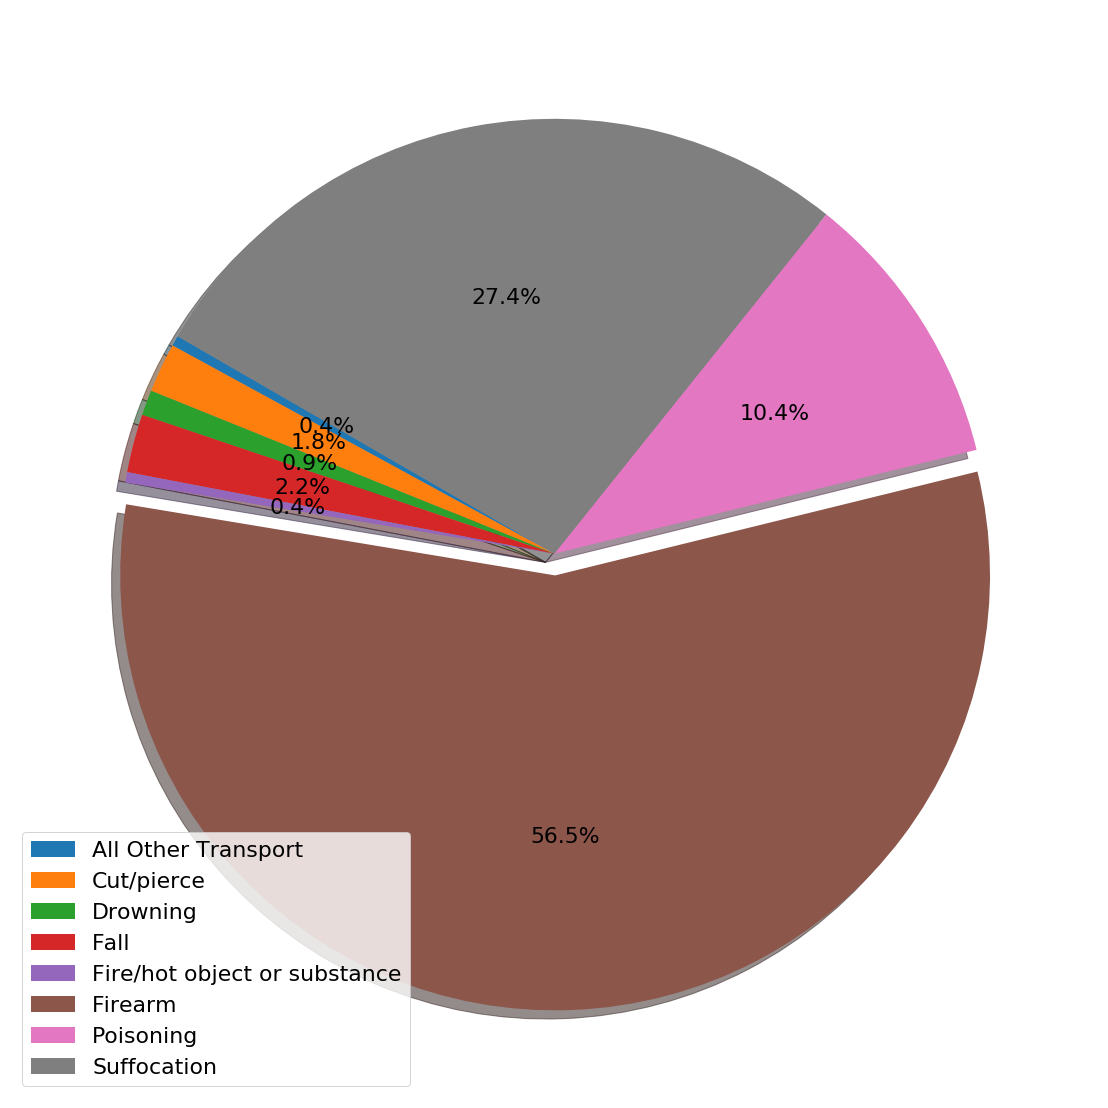

In [9]:
# Set Pie paramenters
plt.figure(figsize=(60,20))
plt.rcParams['font.size'] = 22.0
explode = (0, 0, 0, 0, 0, 0.05, 0, 0)

# Automatically finds the percentages of each part of the pie chart
plt.pie(suicide_method_2015_male_grouped_clean_df["Deaths"], explode=explode, autopct="%0.1f%%", shadow=True, startangle=150)
plt.legend(suicide_method_2015_male_grouped_clean_df.index,loc=3)
#plt.title("Female Suicide Mechanism\n" + "US - 2005", bbox={'facecolor':'0.8', 'pad':5})


#Save Plot
plt.savefig('Output/2015 Male Suicide Mechanism (Pie)')

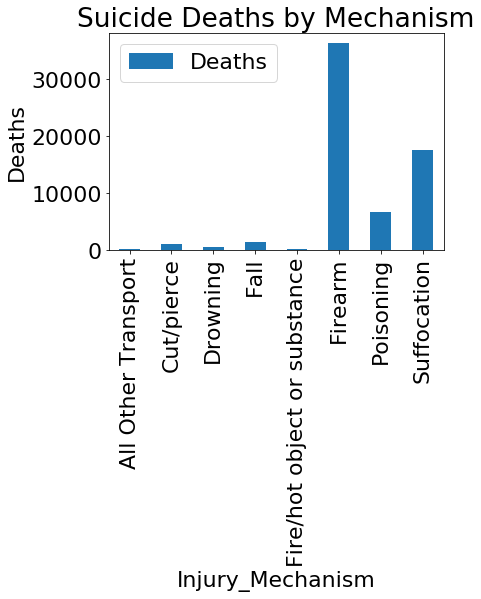

<Figure size 432x288 with 0 Axes>

In [10]:
#Set plot
suicide_mechanism_male_chart = suicide_method_2015_male_grouped_clean_df.plot(kind="bar", title="Suicide Deaths by Mechanism")

#suicide_mechanism_male_chart.set_xlabel("Injury_Mechanism")
suicide_mechanism_male_chart.set_ylabel("Deaths")


plt.show()
plt.tight_layout()

#Save Plot
plt.savefig('Output/2015 Male Suicide Mechanism (Bar)')

## Suicide Method 2015 - Female

In [11]:
# Segregate Female data
suicide_method_2015_female_df=suicide_method_2015_df[suicide_method_2015_df['Sex'] == 'Female']
suicide_method_2015_female_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
13105,2015,Female,All Ages,Cut/pierce,Suicide,157
13231,2015,Female,All Ages,Cut/pierce,Suicide,125
13357,2015,Female,All Ages,Cut/pierce,Suicide,5
13483,2015,Female,All Ages,Cut/pierce,Suicide,11
22177,2015,Female,All Ages,Drowning,Suicide,193
22303,2015,Female,All Ages,Drowning,Suicide,149
22429,2015,Female,All Ages,Drowning,Suicide,17
22555,2015,Female,All Ages,Drowning,Suicide,10
29737,2015,Female,All Ages,Fall,Suicide,279
29863,2015,Female,All Ages,Fall,Suicide,197


In [12]:
suicide_method_2015_female_grouped_df = suicide_method_2015_female_df.groupby(["Injury_Mechanism"]).sum()
suicide_method_2015_female_grouped_df

,Year,Deaths
Injury_Mechanism,,
All Other Transport,8060,91
Cut/pierce,8060,298
Drowning,8060,369
Fall,8060,525
Fire/hot object or substance,8060,100
Firearm,8060,6132
Poisoning,8060,6695
Suffocation,8060,5142


In [13]:
suicide_method_2015_female_grouped_df = suicide_method_2015_female_df.groupby(["Injury_Mechanism"]).sum()
suicide_method_2015_female_grouped_df


suicide_method_2015_female_grouped_df.drop(['Year'], axis=1)


suicide_method_2015_female_grouped_clean_df = suicide_method_2015_female_grouped_df.drop(['Year'], axis=1)

suicide_method_2015_female_grouped_clean_df

,Deaths
Injury_Mechanism,
All Other Transport,91
Cut/pierce,298
Drowning,369
Fall,525
Fire/hot object or substance,100
Firearm,6132
Poisoning,6695
Suffocation,5142


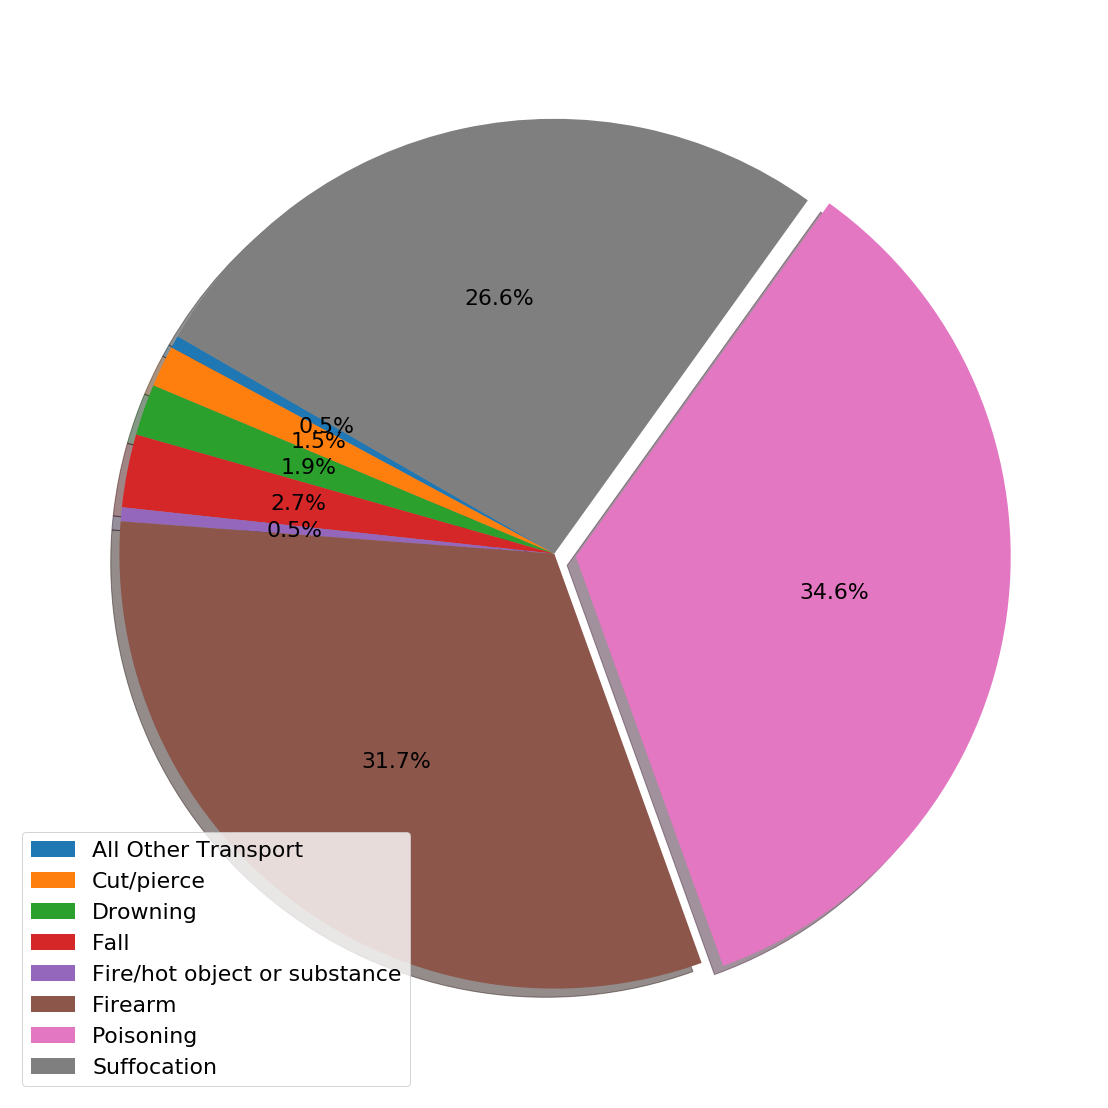

In [14]:
# Set Pie paramenters
plt.figure(figsize=(60,20))
plt.rcParams['font.size'] = 22.0

explode = (0, 0, 0, 0, 0, 0, 0.05, 0)
# Automatically finds the percentages of each part of the pie chart
plt.pie(suicide_method_2015_female_grouped_clean_df["Deaths"], explode=explode, autopct="%0.1f%%", shadow=True, startangle=150)
plt.legend(suicide_method_2015_female_grouped_clean_df.index,loc=3)
#plt.title("Female Suicide Mechanism\n" + "US - 2005", bbox={'facecolor':'0.8', 'pad':5})

#Save Plot
plt.savefig('Output/2015 Female Suicide Mechanism (Pie)')

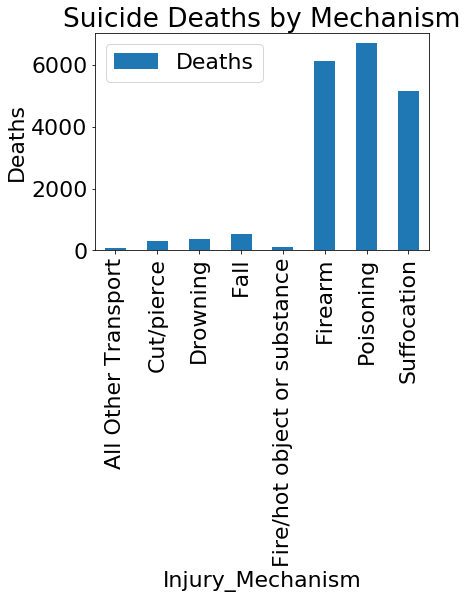

<Figure size 2160x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
suicide_mechanism_female_chart = suicide_method_2015_female_grouped_clean_df.plot(kind="bar", title="Suicide Deaths by Mechanism")
#suicide_mechanism_male_chart.set_xlabel("Injury_Mechanism")
suicide_mechanism_female_chart.set_ylabel("Deaths")


plt.figure(figsize=(30,10))
plt.show()
plt.tight_layout()

#Save Plot
plt.savefig('Output/2015 Female Suicide Mechanism (Bar)')

In [16]:
# Push the remade DataFrame to a new CSV file
suicide_method_2015_male_grouped_clean_df.to_csv("Output/Suicide_Mechanisms_2015_Male.csv",
                  encoding="utf-8", index=False, header=True)


# Push the remade DataFrame to a new CSV file
suicide_method_2015_female_grouped_clean_df.to_csv("Output/Suicide_Mechanisms_2015_Female.csv",
                  encoding="utf-8", index=False, header=True)


# 2005 Data

## Suicide Method 2005 - Male

In [17]:
suicide_method_2005_df = suicide_method_df.query("Year == '2005'")
suicide_method_2005_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
12611,2005,Male,All Ages,Cut/pierce,Suicide,486
12737,2005,Male,All Ages,Cut/pierce,Suicide,391
12863,2005,Male,All Ages,Cut/pierce,Suicide,29
12989,2005,Male,All Ages,Cut/pierce,Suicide,43
13115,2005,Female,All Ages,Cut/pierce,Suicide,104
13241,2005,Female,All Ages,Cut/pierce,Suicide,84
13367,2005,Female,All Ages,Cut/pierce,Suicide,4
13493,2005,Female,All Ages,Cut/pierce,Suicide,6
21683,2005,Male,All Ages,Drowning,Suicide,258
21809,2005,Male,All Ages,Drowning,Suicide,181


In [18]:
suicide_method_2005_male_df=suicide_method_2005_df[suicide_method_2005_df['Sex'] == 'Male']

suicide_method_2005_male_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
12611,2005,Male,All Ages,Cut/pierce,Suicide,486
12737,2005,Male,All Ages,Cut/pierce,Suicide,391
12863,2005,Male,All Ages,Cut/pierce,Suicide,29
12989,2005,Male,All Ages,Cut/pierce,Suicide,43
21683,2005,Male,All Ages,Drowning,Suicide,258
21809,2005,Male,All Ages,Drowning,Suicide,181
21935,2005,Male,All Ages,Drowning,Suicide,47
22061,2005,Male,All Ages,Drowning,Suicide,13
29244,2005,Male,All Ages,Fall,Suicide,499
29369,2005,Male,All Ages,Fall,Suicide,361


In [19]:
suicide_method_2005_male_grouped_df = suicide_method_2005_male_df.groupby(["Injury_Mechanism"]).sum()
suicide_method_2005_male_grouped_df


suicide_method_2005_male_grouped_df.drop(['Year'], axis=1)


suicide_method_2005_male_grouped_clean_df = suicide_method_2005_male_grouped_df.drop(['Year'], axis=1)

suicide_method_2005_male_grouped_clean_df

,Deaths
Injury_Mechanism,
All Other Transport,160
Cut/pierce,949
Drowning,499
Fall,962
Fire/hot object or substance,201
Firearm,29520
Poisoning,6144
Suffocation,11427


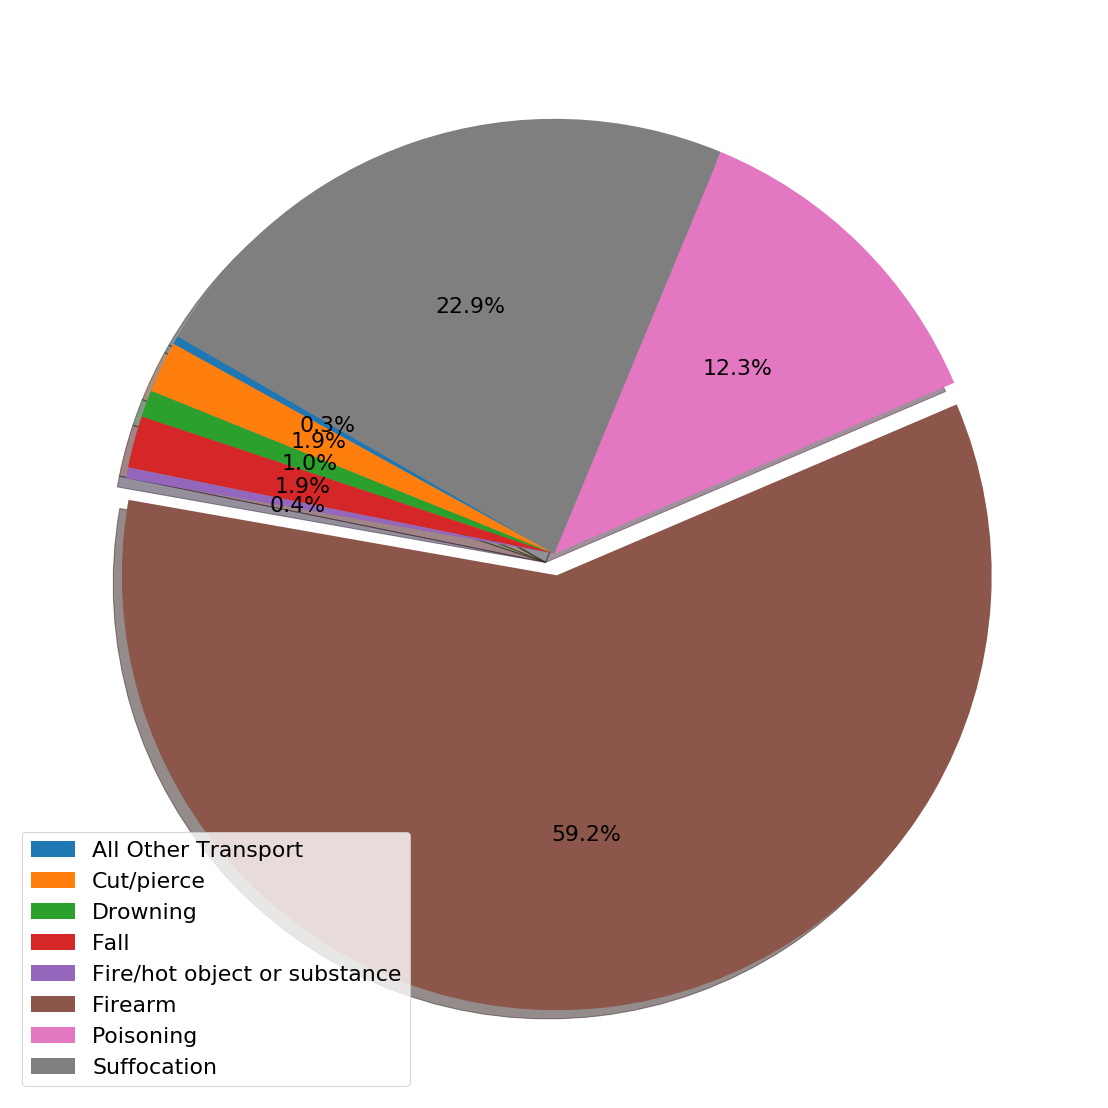

In [20]:
# Set Pie paramenters
plt.figure(figsize=(60,20))
plt.rcParams['font.size'] = 22.0

explode = (0, 0, 0, 0, 0, 0.05, 0, 0)
# Automatically finds the percentages of each part of the pie chart
#plt.pie(suicide_method_2005_male_grouped_clean_df["Deaths"], explode=explode, labels=suicide_method_2005_male_grouped_clean_df.index, autopct="%0.01f%%", pctdistance=1.1, labeldistance=1.2, shadow=True, startangle=150)


# Automatically finds the percentages of each part of the pie chart
plt.pie(suicide_method_2005_male_grouped_clean_df["Deaths"], explode=explode, autopct="%0.1f%%", shadow=True, startangle=150)
plt.legend(suicide_method_2005_male_grouped_clean_df.index,loc=3)
#plt.title("Female Suicide Mechanism\n" + "US - 2005", bbox={'facecolor':'0.8', 'pad':5})

#Save Plot
plt.savefig('Output/2005 Male Suicide Mechanism (Pie)')

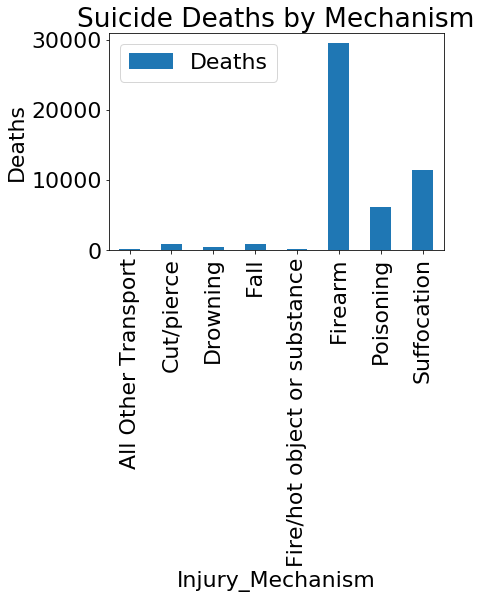

<Figure size 432x288 with 0 Axes>

In [21]:
suicide_mechanism_male_2005_chart = suicide_method_2005_male_grouped_clean_df.plot(kind="bar", title="Suicide Deaths by Mechanism")
#suicide_mechanism_male_chart.set_xlabel("Injury_Mechanism")
suicide_mechanism_male_2005_chart.set_ylabel("Deaths")


plt.show()
plt.tight_layout()

#Save Plot
plt.savefig('Output/2005 Male Suicide Mechanism (Bar)')

## Suicide Method 2005 - Female

In [22]:
#Select 2006 data
suicide_method_2005_df = suicide_method_df.query("Year == '2005'")
suicide_method_2005_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
12611,2005,Male,All Ages,Cut/pierce,Suicide,486
12737,2005,Male,All Ages,Cut/pierce,Suicide,391
12863,2005,Male,All Ages,Cut/pierce,Suicide,29
12989,2005,Male,All Ages,Cut/pierce,Suicide,43
13115,2005,Female,All Ages,Cut/pierce,Suicide,104
13241,2005,Female,All Ages,Cut/pierce,Suicide,84
13367,2005,Female,All Ages,Cut/pierce,Suicide,4
13493,2005,Female,All Ages,Cut/pierce,Suicide,6
21683,2005,Male,All Ages,Drowning,Suicide,258
21809,2005,Male,All Ages,Drowning,Suicide,181


In [23]:
#Segregate Female data
suicide_method_2005_female_df=suicide_method_2005_df[suicide_method_2005_df['Sex'] == 'Female']
suicide_method_2005_female_df

,Year,Sex,Age_Group,Injury_Mechanism,Injury_Intent,Deaths
13115,2005,Female,All Ages,Cut/pierce,Suicide,104
13241,2005,Female,All Ages,Cut/pierce,Suicide,84
13367,2005,Female,All Ages,Cut/pierce,Suicide,4
13493,2005,Female,All Ages,Cut/pierce,Suicide,6
22187,2005,Female,All Ages,Drowning,Suicide,117
22313,2005,Female,All Ages,Drowning,Suicide,92
22439,2005,Female,All Ages,Drowning,Suicide,10
22565,2005,Female,All Ages,Drowning,Suicide,4
29747,2005,Female,All Ages,Fall,Suicide,184
29873,2005,Female,All Ages,Fall,Suicide,130


In [24]:
# Group data by Injury Mechanism
suicide_method_2005_female_grouped_df = suicide_method_2005_female_df.groupby(["Injury_Mechanism"]).sum()
suicide_method_2005_female_grouped_df
suicide_method_2005_female_grouped_df.drop(['Year'], axis=1)
suicide_method_2005_female_grouped_clean_df = suicide_method_2005_female_grouped_df.drop(['Year'], axis=1)
suicide_method_2005_female_grouped_clean_df

,Deaths
Injury_Mechanism,
All Other Transport,62
Cut/pierce,198
Drowning,223
Fall,345
Fire/hot object or substance,102
Firearm,4132
Poisoning,5185
Suffocation,2575


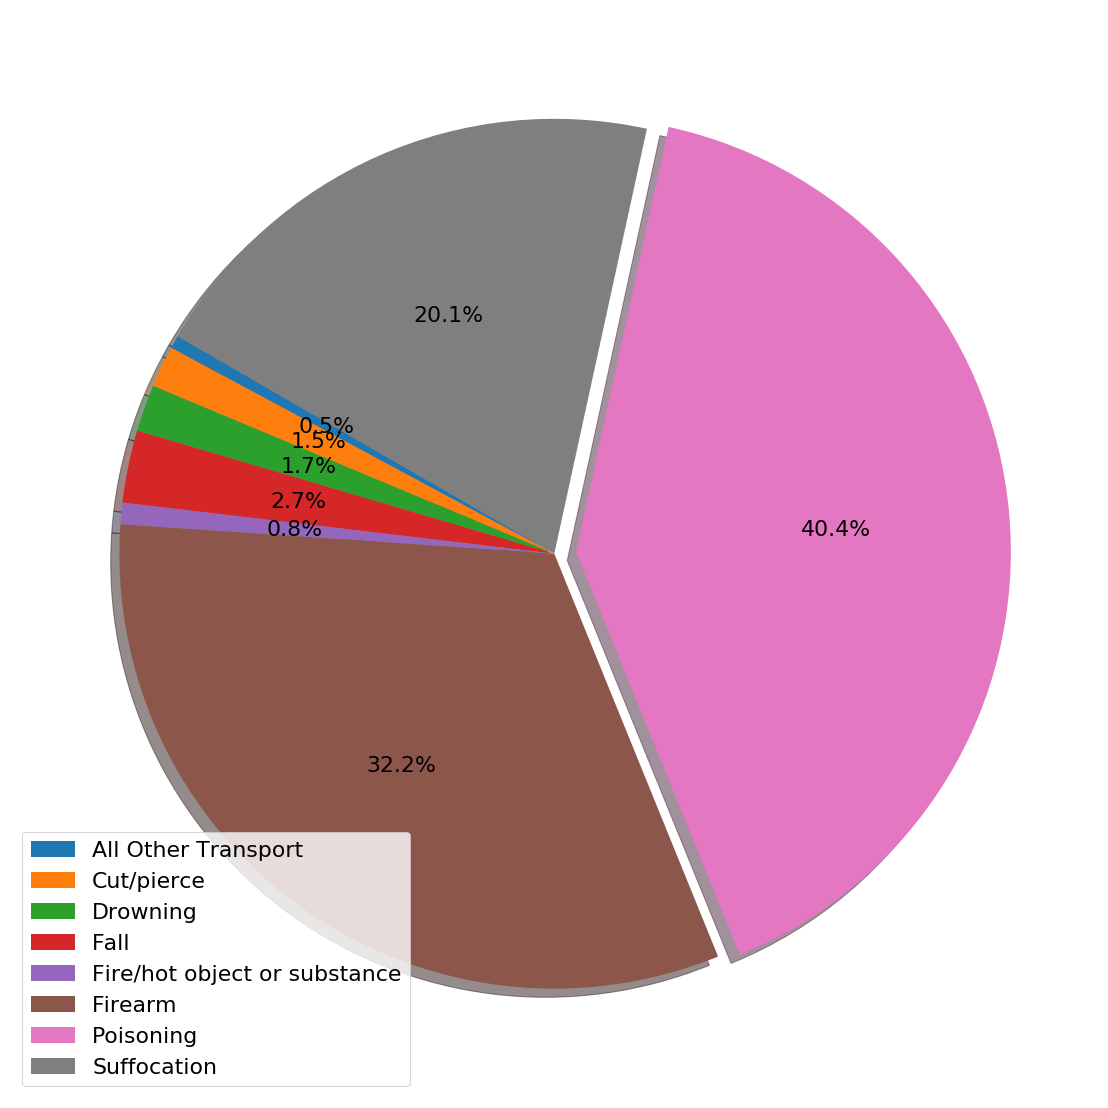

In [25]:
# Set Pie paramenters
plt.figure(figsize=(60,20))
plt.rcParams['font.size'] = 22.0
explode = (0, 0, 0, 0, 0, 0, 0.05, 0)

# # Automatically finds the percentages of each part of the pie chart
# plt.pie(suicide_method_2005_female_grouped_clean_df["Deaths"], explode=explode, labels=suicide_method_2005_female_grouped_clean_df.index, autopct="%0.01f%%", pctdistance=1.1, labeldistance=1.2, shadow=True, startangle=150)
# plt.legend(suicide_method_2005_female_grouped_clean_df.index,loc=3)
# #plt.title("Female Suicide Mechanism\n" + "US - 2005", bbox={'facecolor':'0.8', 'pad':5})


# Automatically finds the percentages of each part of the pie chart
plt.pie(suicide_method_2005_female_grouped_clean_df["Deaths"], explode=explode, autopct="%0.1f%%", shadow=True, startangle=150)
plt.legend(suicide_method_2005_female_grouped_clean_df.index,loc=3)
#plt.title("Female Suicide Mechanism\n" + "US - 2005", bbox={'facecolor':'0.8', 'pad':5})




#Save Plot
plt.savefig('Output/2005 Female Suicide Mechanism (Pie)')

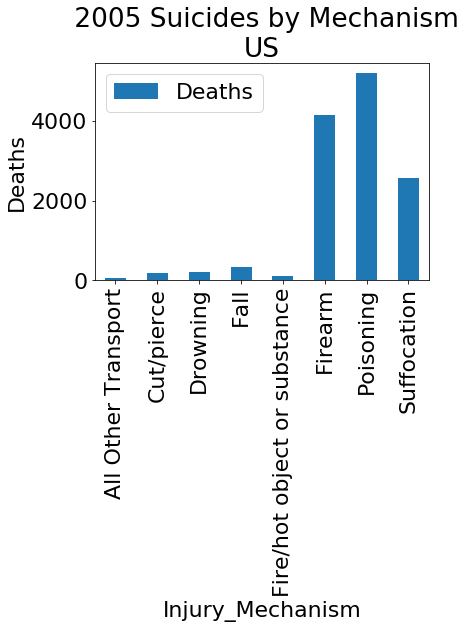

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot Bar
suicide_mechanism_female_2005_chart = suicide_method_2005_female_grouped_clean_df.plot(kind="bar", title=" 2005 Suicides by Mechanism\n" + "US")
suicide_mechanism_female_2005_chart.set_ylabel("Deaths")
plt.show()
plt.tight_layout()

#Save Plot
plt.savefig('Output/2005 Female Suicide Mechanism (Bar)')

In [27]:
# Push the remade DataFrame to a new CSV file
suicide_method_2005_male_grouped_clean_df.to_csv("Output/Suicide_Mechanisms_2005_Male.csv",
                  encoding="utf-8", index=False, header=True)


# Push the remade DataFrame to a new CSV file
suicide_method_2005_female_grouped_clean_df.to_csv("Output/Suicide_Mechanisms_2005_Female.csv",
                  encoding="utf-8", index=False, header=True)


# Suicide Rate by Age 

In [118]:
##Import Death Mechanism CSV File
file = "Suicide_by_Age_Group - 2005.csv"

# Read Death Mechanism File 
suicide_by_age_2005_df = pd.read_csv(file)

suicide_by_age_2005_df.dtypes


Age Group    object
Deaths        int64
dtype: object

In [119]:
suicide_by_age_2005_df.set_index("Age Group",drop=True,inplace=True)
suicide_by_age_2005_df

,Deaths
Age Group,
< 15,1044
15–24,16370
25–44,42154
45–64,44210
65–74,9272
75+,12094


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

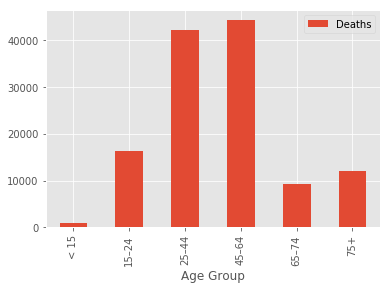

In [120]:
suicide_by_age_2005_df.plot.bar()
plt.set_xticklabels(suicide_by_age_2005_df,rotation=45)
plt.show()

In [121]:
plt.savefig('Output/2005 Suicide by Age Group (Bar).png')

<Figure size 432x288 with 0 Axes>

In [122]:
##Import Death Mechanism CSV File
file = "Suicide_by_Age_Group - 2015.csv"

# Read Death Mechanism File 
suicide_by_age_2015_df = pd.read_csv(file)

suicide_by_age_2015_df.dtypes


Age Group    object
Deaths        int64
dtype: object

In [123]:
suicide_by_age_2015_df.set_index("Age Group",drop=True,inplace=True)
suicide_by_age_2015_df

,Deaths
Age Group,
< 15,1594
15–24,21098
25–44,54102
45–64,64782
65–74,16554
75+,14610


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

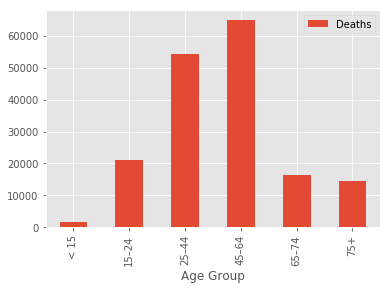

In [124]:
suicide_by_age_2015_df.plot.bar()
plt.set_xticklabels(suicide_by_age_2015_df,rotation=45)
plt.show()

In [125]:
plt.savefig('Output/2015 Suicide by Age Group (Bar).png')

<Figure size 432x288 with 0 Axes>